In [15]:
# MODULE 
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rc  

# 한글 폰트 설정
font_path='./Font/malgun.ttf'
font_name=fm.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

# FILE
DIR ='./Data/'
FILE1=DIR+'월별_국내여행_지출(2018~2020).csv'
FILE2=DIR+'월별_국내여행_횟수(2018~2020).csv'

In [16]:
travelNumberDF=pd.read_csv(FILE2, encoding='CP949',header=None)
travelNumberDF.head()
# (단위: 천회)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,통계분류(1),통계분류(2),2018,2018,2018,2018,2018,2018,2018,2018,...,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020
1,통계분류(1),통계분류(2),1월,2월,3월,4월,5월,6월,7월,8월,...,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
2,전체,소계,24233,28263,24668,24242,24571,24600,24628,25298,...,12698,16523,19723,19572,21068,19942,18309,18622,16079,16261
3,성별,남자,13019,14868,12768,12099,12607,12600,12887,12791,...,6586,8566,9860,9964,10831,10335,9838,9407,8312,8721
4,성별,여자,11214,13396,11900,12143,11965,12000,11741,12507,...,6111,7957,9863,9608,10237,9607,8471,9215,7767,7540


## 데이터 전처리 :

In [17]:
# 필요한 행만 유지
travelNumberDF=travelNumberDF.iloc[:3]
travelNumberDF

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,통계분류(1),통계분류(2),2018,2018,2018,2018,2018,2018,2018,2018,...,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020
1,통계분류(1),통계분류(2),1월,2월,3월,4월,5월,6월,7월,8월,...,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
2,전체,소계,24233,28263,24668,24242,24571,24600,24628,25298,...,12698,16523,19723,19572,21068,19942,18309,18622,16079,16261


In [18]:
# 0번, 1번 열 삭제
travelNumberDF.drop([0,1],axis=1,inplace=True)
travelNumberDF

,2,3,4,5,6,7,8,9,10,11,...,28,29,30,31,32,33,34,35,36,37
0,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,...,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020
1,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,...,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
2,24233,28263,24668,24242,24571,24600,24628,25298,29371,26051,...,12698,16523,19723,19572,21068,19942,18309,18622,16079,16261


In [19]:
# 행열 전환
travelNumberDF=travelNumberDF.T
travelNumberDF.head()

,0,1,2
2,2018,1월,24233
3,2018,2월,28263
4,2018,3월,24668
5,2018,4월,24242
6,2018,5월,24571


In [20]:
# 칼럼명 설정 
travelNumberDF.columns=['year','month','number']
travelNumberDF.head(3)

,year,month,number
2,2018,1월,24233
3,2018,2월,28263
4,2018,3월,24668


In [21]:
# month 컬럼 int64로 type cast
month_list=[]
for i in travelNumberDF['month']:
    month_list.append(i[:-1])

travelNumberDF['month']=month_list

travelNumberDF.head(3)

,year,month,number
2,2018,1,24233
3,2018,2,28263
4,2018,3,24668


In [22]:
# 데이터 type 확인
# 데이터 type 확인
travelNumberDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 2 to 37
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    36 non-null     object
 1   month   36 non-null     object
 2   number  36 non-null     object
dtypes: object(3)
memory usage: 2.2+ KB


In [23]:
# type cast 
travelNumberDF=travelNumberDF.astype('int64')
travelNumberDF.dtypes

year      int64
month     int64
number    int64
dtype: object

In [24]:
# 연도별 DF 생성 
travelNumberDF_year=travelNumberDF.groupby(by='year')
travelNumberDF_2018=travelNumberDF_year.get_group(2018)
travelNumberDF_2019=travelNumberDF_year.get_group(2019)
travelNumberDF_2020=travelNumberDF_year.get_group(2020)

In [25]:
# 각 DF year drop 및 month 칼럼 인덱스 설정
travelNumberDF_lst=[travelNumberDF_2018,travelNumberDF_2019,travelNumberDF_2020]
for i in travelNumberDF_lst:
    i.drop('year',axis=1,inplace=True)
    i.set_index('month',inplace=True)

travelNumberDF_2018

C:\Users\User\AppData\Local\Temp\ipykernel_16460\1973532684.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop('year',axis=1,inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16460\1973532684.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop('year',axis=1,inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16460\1973532684.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop('year',axis=1,inplace=True

,number
month,
1,24233
2,28263
3,24668
4,24242
5,24571
6,24600
7,24628
8,25298
9,29371


In [26]:
travelNumberDF_allyear=pd.concat([travelNumberDF_2018,travelNumberDF_2019,travelNumberDF_2020],axis=1,ignore_index=True)  
travelNumberDF_allyear.columns=['n_2018','n_2019','n_2020']
travelNumberDF_allyear

,n_2018,n_2019,n_2020
month,,,
1,24233,24442,30775
2,28263,34251,15627
3,24668,25368,12698
4,24242,27897,16523
5,24571,28575,19723
6,24600,24443,19572
7,24628,28943,21068
8,25298,28682,19942
9,29371,33033,18309


<AxesSubplot:xlabel='month'>

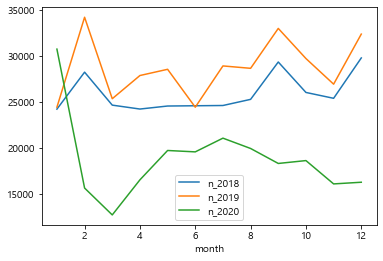

In [27]:
travelNumberDF_allyear.plot()

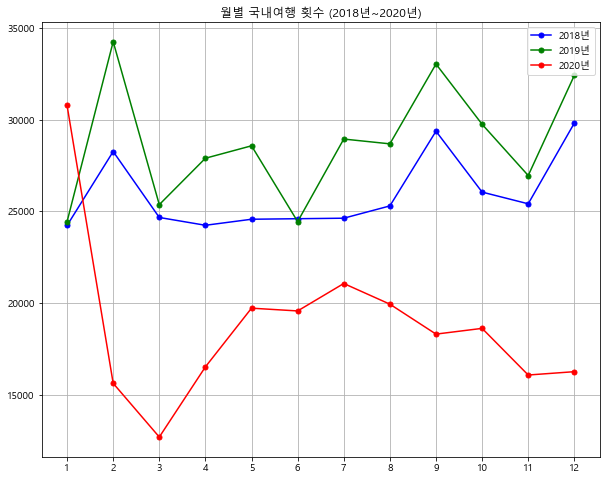

In [28]:
plt.figure(figsize=(10,8))
line1=plt.plot(travelNumberDF_allyear.index, travelNumberDF_allyear['n_2018'],'bo-',ms=5,label='2018년')
line2=plt.plot(travelNumberDF_allyear.index, travelNumberDF_allyear['n_2019'],'go-',ms=5,label='2019년')
line3=plt.plot(travelNumberDF_allyear.index, travelNumberDF_allyear['n_2020'],'ro-',ms=5,label='2020년')

plt.title('월별 국내여행 횟수 (2018년~2020년)')
plt.xticks(list(travelNumberDF_allyear.index))
plt.grid(True)

lines=line1+line2+line3
labels=[l.get_label() for l in lines]
plt.legend(lines, labels, loc='upper right')

In [ ]:
# 2월 설날 / 9월 추석 (+단풍) 

# 코로나 첫 확진자 - 2020년 1월 20일 
# 2020년 1월 기온이 2018,2019년도 1월 기온보다 상회 
